In [1]:
import pandas as pd
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# read all sheets
j = 1
sheets = {}
for i in range(6):
    sheets[i] = pd.read_excel("impactpaperbackseriestables.xlsx", 'Table '+str(j)+' - '+str(2005+j)+'-'+str(2009+j))
    print('Table '+str(j)+' - '+str(2005+j)+'-'+str(2009+j))
    j = j+1

display(sheets[1])

# bit messy, let's cleanup
for i in range(6):
    l = len(sheets[i])
    # remove footer rows
    sheets[i]= sheets[i].drop(l-1)
    sheets[i]= sheets[i].drop(l-2)
    sheets[i]= sheets[i].drop(l-3)
    sheets[i]= sheets[i].drop(l-4)
    sheets[i]= sheets[i].drop(0)
    sheets[i]= sheets[i].drop(1)
    # rename colums
    sheets[i] = sheets[i].rename(columns={"Contents": "type"})
    sheets[i] = sheets[i].rename(columns={"Unnamed: 1": "sex"})
    sheets[i] = sheets[i].rename(columns={"Unnamed: 2": "age_group"})
    sheets[i] = sheets[i].rename(columns={"Unnamed: 3": "number_of_patients"})
    sheets[i] = sheets[i].rename(columns={"Unnamed: 4": "1_year_survival_%"})
    sheets[i] = sheets[i].rename(columns={"Unnamed: 5": "lower_95%_CI_1_year"})
    sheets[i] = sheets[i].rename(columns={"Unnamed: 6": "upper_95%_CI_1_year"})
    sheets[i] = sheets[i].rename(columns={"Unnamed: 7": "5_year_survival_%"})
    sheets[i] = sheets[i].rename(columns={"Unnamed: 8": "lower_95%_CI_5_year"})
    sheets[i] = sheets[i].rename(columns={"Unnamed: 9": "upper_95%_CI_5_year"})
    # remove duplicate row now that columns are correctly renamed
    sheets[i] = sheets[i].drop(2)
    # drop unwanted column
    try:
        sheets[i] = sheets[i].drop(columns=['Unnamed: 10'])
    except:
        continue
# after cleanup
display(sheets[1])
# fill Nan sex values
for i in range(6):
    for idx, s in enumerate(sheets[i]['sex']):
        if str(s) != 'nan':
            proceding = str(s)
        if str(s) == 'nan':
            sheets[i].loc[idx+3,"sex"] = proceding

# same thing with cancer types
for i in range(6):
    for idx, s in enumerate(sheets[i]['type']):
        if str(s) != 'nan':
            proceding = str(s)
        if str(s) == 'nan':
            sheets[i].loc[idx+3,"type"] = proceding
display(sheets[1])
    

Table 1 - 2006-2010
Table 2 - 2007-2011
Table 3 - 2008-2012
Table 4 - 2009-2013
Table 5 - 2010-2014
Table 6 - 2011-2015


,Contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Table 2. One-year and Five-year Net Survival (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cancer,Sex,Age group,Number of Patients,1-year \nsurvival (%),Lower \n95% CI,Upper \n95% CI,5-year \nsurvival (%),Lower \n95% CI,Upper \n95% CI
3,Anus,Male,Age-standardised,1648,77.8,75.5,80.2,:,:,:
4,NaN,NaN,Non-standardised,1648,79.8,77.7,81.8,54.4,50.6,58.3
...,...,...,...,...,...,...,...,...,...,...
514,NaN,NaN,75-99,2288,74.3,72.2,76.3,62.4,57.7,67.1
515,Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,1. The ':' symbol denotes 'not available' beca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,"2. More information relating to the method, ag...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,type,sex,age_group,number_of_patients,1_year_survival_%,lower_95%_CI_1_year,upper_95%_CI_1_year,5_year_survival_%,lower_95%_CI_5_year,upper_95%_CI_5_year
3,Anus,Male,Age-standardised,1648,77.8,75.5,80.2,:,:,:
4,NaN,NaN,Non-standardised,1648,79.8,77.7,81.8,54.4,50.6,58.3
5,NaN,NaN,15-44,143,89.6,84.6,94.7,:,:,:
6,NaN,NaN,45-54,266,84.9,80.6,89.3,:,:,:
7,NaN,NaN,55-64,419,88.4,85.2,91.6,57.7,51.1,64.3
...,...,...,...,...,...,...,...,...,...,...
510,NaN,NaN,15-54,929,:,:,:,86.1,83.3,88.9
511,NaN,NaN,45-54,570,95.5,93.7,97.2,:,:,:
512,NaN,NaN,55-64,701,90.8,88.6,93,77.5,73.3,81.8
513,NaN,NaN,65-74,898,86.3,83.9,88.6,70.3,66.1,74.5


,type,sex,age_group,number_of_patients,1_year_survival_%,lower_95%_CI_1_year,upper_95%_CI_1_year,5_year_survival_%,lower_95%_CI_5_year,upper_95%_CI_5_year
3,Anus,Male,Age-standardised,1648,77.8,75.5,80.2,:,:,:
4,Anus,Male,Non-standardised,1648,79.8,77.7,81.8,54.4,50.6,58.3
5,Anus,Male,15-44,143,89.6,84.6,94.7,:,:,:
6,Anus,Male,45-54,266,84.9,80.6,89.3,:,:,:
7,Anus,Male,55-64,419,88.4,85.2,91.6,57.7,51.1,64.3
...,...,...,...,...,...,...,...,...,...,...
510,Vulva,Female,15-54,929,:,:,:,86.1,83.3,88.9
511,Vulva,Female,45-54,570,95.5,93.7,97.2,:,:,:
512,Vulva,Female,55-64,701,90.8,88.6,93,77.5,73.3,81.8
513,Vulva,Female,65-74,898,86.3,83.9,88.6,70.3,66.1,74.5


In [2]:
# print columns to see what we have
sheets[1].info()
# quick casting
for i in range(6):
    sheets[i]['number_of_patients']= sheets[i]['number_of_patients'].astype('int')
    sheets[i]['sex']= sheets[i]['sex'].astype('string')
    sheets[i]['type']= sheets[i]['type'].astype('string')
    sheets[i]['age_group']= sheets[i]['age_group'].astype('string')

    # handle floats
    sheets[i]["1_year_survival_%"] =  pd.to_numeric(sheets[i]["1_year_survival_%"], errors='coerce')
    sheets[i]["5_year_survival_%"] =  pd.to_numeric(sheets[i]["5_year_survival_%"], errors='coerce')
    sheets[i]["lower_95%_CI_1_year"] =  pd.to_numeric(sheets[i]["lower_95%_CI_1_year"], errors='coerce')
    sheets[i]["upper_95%_CI_1_year"] =  pd.to_numeric(sheets[i]["upper_95%_CI_1_year"], errors='coerce')
    sheets[i]["lower_95%_CI_5_year"] =  pd.to_numeric(sheets[i]["lower_95%_CI_5_year"], errors='coerce')
    sheets[i]["upper_95%_CI_5_year"] =  pd.to_numeric(sheets[i]["upper_95%_CI_5_year"], errors='coerce')

sheets[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 3 to 514
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 512 non-null    object
 1   sex                  512 non-null    object
 2   age_group            512 non-null    object
 3   number_of_patients   512 non-null    object
 4   1_year_survival_%    512 non-null    object
 5   lower_95%_CI_1_year  512 non-null    object
 6   upper_95%_CI_1_year  512 non-null    object
 7   5_year_survival_%    512 non-null    object
 8   lower_95%_CI_5_year  512 non-null    object
 9   upper_95%_CI_5_year  512 non-null    object
dtypes: object(10)
memory usage: 60.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 3 to 514
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 512 non-null    string 
 1   sex  

In [3]:
# print all types of cancer we have
types = list(set(sheets[1]['type']))
print(types)

['Oesophagus', 'Uterus', 'Larynx', 'Pancreas', 'Testis', 'Vulva', 'Breast', 'Melanoma', 'Brain', 'Urinary tract', 'Rectal', 'Prostate', 'Thyroid', 'Kidney', 'Mesothelioma', 'Cervix', 'Lung', 'Liver', 'Anus', 'Hodgkins', 'Ovary', 'Non-Hodgkins lymphoma', 'Myeloma', 'Colorectal', 'Leukaemia', 'Colon', 'Bladder', 'Stomach', 'Kidney and urinary tract']


In [4]:
# print age groups we have
groups = list(set(sheets[1]['age_group']))
print(groups)

['75-84', 'Non-standardised', '85-99', '65-99', '15-44', '55-64', '75-99', '45-54', '65-74', '15-54', 'Age-standardised']


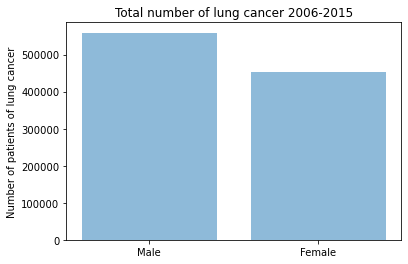

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# visualise total male and female 2006-2015
# construct data
n_groups = 2
m_total = 0 
f_total = 0
for i in range(6):
    m_total += sheets[i].query('type=="Lung" & sex=="Male" & age_group=="Non-standardised" ')['number_of_patients'].values[0]
    f_total += sheets[i].query('type=="Lung" & sex=="Female" & age_group=="Non-standardised" ')['number_of_patients'].values[0]
   
objects = ('Male', 'Female')
y_pos = np.arange(len(objects))
performance = [m_total, f_total]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of patients of lung cancer')
plt.title('Total number of lung cancer 2006-2015')

plt.show()

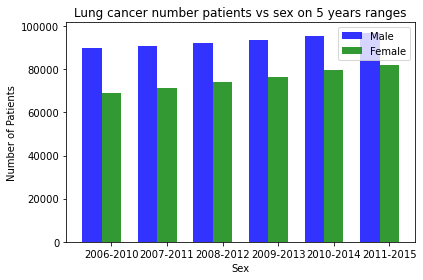

In [6]:
# visualise male female, lung cancer on 5 year ranges

# construct data
n_groups = 6
m = []
f = []
for i in range(6):
    m.append(sheets[i].query('type=="Lung" & sex=="Male" & age_group=="Non-standardised" ')['number_of_patients'].values[0])
    f.append(sheets[i].query('type=="Lung" & sex=="Female" & age_group=="Non-standardised" ')['number_of_patients'].values[0])
   
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, m, bar_width,
alpha=opacity,
color='b',
label='Male')

rects2 = plt.bar(index + bar_width, f, bar_width,
alpha=opacity,
color='g',
label='Female')

plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.title('Lung cancer number patients vs sex on 5 years ranges')
plt.xticks(index + bar_width, ('2006-2010', '2007-2011', '2008-2012', '2009-2013', '2010-2014', '2011-2015'))
plt.legend()

plt.tight_layout()
plt.show()


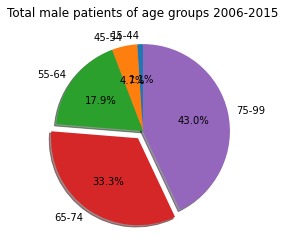

In [7]:
# visualise male, lung cancer total pie chart, by age groups 

# construct data
n_groups = 6
m_15_44_total = 0
m_45_54_total = 0
m_55_64_total = 0
m_65_74_total = 0
m_75_99_total = 0
for i in range(6):
    m_15_44_total += sheets[i].query('type=="Lung" & sex=="Male" & age_group=="15-44" ')['number_of_patients'].values[0]
    m_45_54_total += sheets[i].query('type=="Lung" & sex=="Male" & age_group=="45-54" ')['number_of_patients'].values[0]
    m_55_64_total += sheets[i].query('type=="Lung" & sex=="Male" & age_group=="55-64" ')['number_of_patients'].values[0]
    m_65_74_total += sheets[i].query('type=="Lung" & sex=="Male" & age_group=="65-74" ')['number_of_patients'].values[0]
    m_75_99_total += sheets[i].query('type=="Lung" & sex=="Male" & age_group=="75-99" ')['number_of_patients'].values[0]

m_total_pie = np.array([m_15_44_total, m_45_54_total, m_55_64_total, m_65_74_total, m_75_99_total])
m_total_pie_labels = ["15-44", "45-54", "55-64", "65-74", "75-99"]

plt.pie(m_total_pie, labels=m_total_pie_labels, autopct='%1.1f%%', explode=[0,0,0,0.1,0], shadow=True, startangle=90)
plt.title("Total male patients of age groups 2006-2015")
plt.show() 


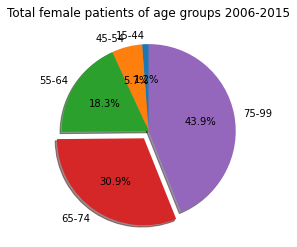

In [8]:
# visualise female, lung cancer total pie chart, by age groups 

# construct data
n_groups = 6
f_15_44_total = 0
f_45_54_total = 0
f_55_64_total = 0
f_65_74_total = 0
f_75_99_total = 0
for i in range(6):
    f_15_44_total += sheets[i].query('type=="Lung" & sex=="Female" & age_group=="15-44" ')['number_of_patients'].values[0]
    f_45_54_total += sheets[i].query('type=="Lung" & sex=="Female" & age_group=="45-54" ')['number_of_patients'].values[0]
    f_55_64_total += sheets[i].query('type=="Lung" & sex=="Female" & age_group=="55-64" ')['number_of_patients'].values[0]
    f_65_74_total += sheets[i].query('type=="Lung" & sex=="Female" & age_group=="65-74" ')['number_of_patients'].values[0]
    f_75_99_total += sheets[i].query('type=="Lung" & sex=="Female" & age_group=="75-99" ')['number_of_patients'].values[0]

f_total_pie = np.array([f_15_44_total, f_45_54_total, f_55_64_total, f_65_74_total, f_75_99_total])
f_total_pie_labels = ["15-44", "45-54", "55-64", "65-74", "75-99"]

plt.pie(f_total_pie, labels=f_total_pie_labels, autopct='%1.1f%%', explode=[0,0,0,0.1,0], shadow=True, startangle=90)
plt.title("Total female patients of age groups 2006-2015")
plt.show() 

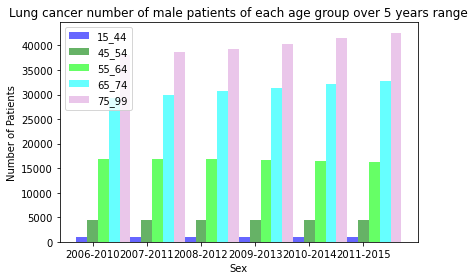

In [9]:
# visualise male, lung cancer on 5 year ranges, per age groups 

# construct data
n_groups = 6
m_15_44 = []
m_45_54 = []
m_55_64 = []
m_65_74 = []
m_75_99 = []
for i in range(6):
    m_15_44.append(sheets[i].query('type=="Lung" & sex=="Male" & age_group=="15-44" ')['number_of_patients'].values[0])
    m_45_54.append(sheets[i].query('type=="Lung" & sex=="Male" & age_group=="45-54" ')['number_of_patients'].values[0])
    m_55_64.append(sheets[i].query('type=="Lung" & sex=="Male" & age_group=="55-64" ')['number_of_patients'].values[0])
    m_65_74.append(sheets[i].query('type=="Lung" & sex=="Male" & age_group=="65-74" ')['number_of_patients'].values[0])
    m_75_99.append(sheets[i].query('type=="Lung" & sex=="Male" & age_group=="75-99" ')['number_of_patients'].values[0])
   
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.6

rects1 = plt.bar(index, m_15_44, bar_width,
alpha=opacity,
color='b',
label='15_44')

rects2 = plt.bar(index + bar_width, m_45_54, bar_width,
alpha=opacity,
color='g',
label='45_54')

rects3 = plt.bar(index + 2*bar_width, m_55_64, bar_width,
alpha=opacity,
color='lime',
label='55_64')

rects4 = plt.bar(index + 3*bar_width, m_65_74, bar_width,
alpha=opacity,
color='aqua',
label='65_74')

rects5 = plt.bar(index + 4*bar_width, m_75_99, bar_width,
alpha=opacity,
color='plum',
label='75_99')

plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.title('Lung cancer number of male patients of each age group over 5 years range')
plt.xticks(index + bar_width, ('2006-2010', '2007-2011', '2008-2012', '2009-2013', '2010-2014', '2011-2015'))
plt.legend()

plt.tight_layout()
plt.show()

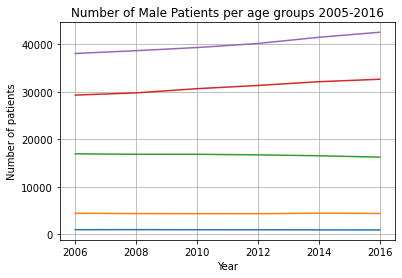

In [10]:
from pylab import *
# visualise male, lung cancer on 5 year ranges, per age groups change 2006-2015

t = arange(2006, 2017, 2)
plot(t, m_15_44)
plot(t, m_45_54)
plot(t, m_55_64)
plot(t, m_65_74)
plot(t, m_75_99)

xlabel('Year')
ylabel('Number of patients')
title('Number of Male Patients per age groups 2005-2016')
grid(True)
show()

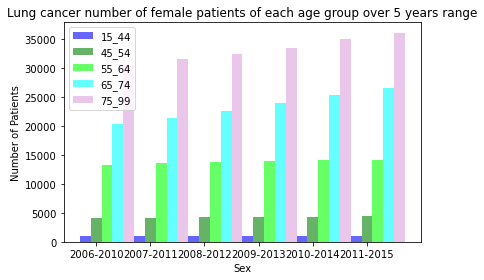

In [11]:
# visualise female, lung cancer on 5 year ranges, per age groups 

# construct data
n_groups = 6
f_15_44 = []
f_45_54 = []
f_55_64 = []
f_65_74 = []
f_75_99 = []
for i in range(6):
    f_15_44.append(sheets[i].query('type=="Lung" & sex=="Female" & age_group=="15-44" ')['number_of_patients'].values[0])
    f_45_54.append(sheets[i].query('type=="Lung" & sex=="Female" & age_group=="45-54" ')['number_of_patients'].values[0])
    f_55_64.append(sheets[i].query('type=="Lung" & sex=="Female" & age_group=="55-64" ')['number_of_patients'].values[0])
    f_65_74.append(sheets[i].query('type=="Lung" & sex=="Female" & age_group=="65-74" ')['number_of_patients'].values[0])
    f_75_99.append(sheets[i].query('type=="Lung" & sex=="Female" & age_group=="75-99" ')['number_of_patients'].values[0])
   
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.6

rects1 = plt.bar(index, f_15_44, bar_width,
alpha=opacity,
color='b',
label='15_44')

rects2 = plt.bar(index + bar_width, f_45_54, bar_width,
alpha=opacity,
color='g',
label='45_54')

rects3 = plt.bar(index + 2*bar_width, f_55_64, bar_width,
alpha=opacity,
color='lime',
label='55_64')

rects4 = plt.bar(index + 3*bar_width, f_65_74, bar_width,
alpha=opacity,
color='aqua',
label='65_74')

rects5 = plt.bar(index + 4*bar_width, f_75_99, bar_width,
alpha=opacity,
color='plum',
label='75_99')

plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.title('Lung cancer number of female patients of each age group over 5 years range')
plt.xticks(index + bar_width, ('2006-2010', '2007-2011', '2008-2012', '2009-2013', '2010-2014', '2011-2015'))
plt.legend()

plt.tight_layout()
plt.show()

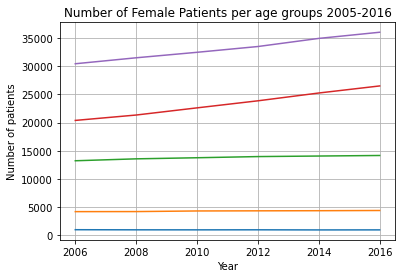

In [12]:
# visualise female, lung cancer on 5 year ranges, per age groups change 2006-2015

t = arange(2006, 2017, 2)
plot(t, f_15_44)
plot(t, f_45_54)
plot(t, f_55_64)
plot(t, f_65_74)
plot(t, f_75_99)

xlabel('Year')
ylabel('Number of patients')
title('Number of Female Patients per age groups 2005-2016')
grid(True)
show()

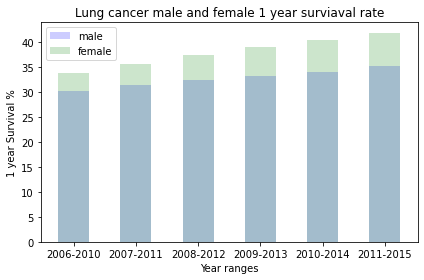

In [13]:
# visualise male and female 1 year survival rate 

# construct data
n_groups = 6

m_survival_1y = []
f_survival_1y = []
for i in range(6):
    m_survival_1y.append(sheets[i].query('type=="Lung" & sex=="Male" & age_group=="Age-standardised" ')['1_year_survival_%'].values[0])
    f_survival_1y.append(sheets[i].query('type=="Lung" & sex=="Female" & age_group=="Age-standardised" ')['1_year_survival_%'].values[0])
    
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.2

rects1 = plt.bar(index, m_survival_1y, bar_width,
alpha=opacity,
color='b',
label='male')

rects1 = plt.bar(index, f_survival_1y, bar_width,
alpha=opacity,
color='g',
label='female')

plt.xlabel('Year ranges')
plt.ylabel('1 year Survival %')
plt.title('Lung cancer male and female 1 year surviaval rate')
plt.xticks(index, ('2006-2010', '2007-2011', '2008-2012', '2009-2013', '2010-2014', '2011-2015'))
plt.legend()

plt.tight_layout()
plt.show()

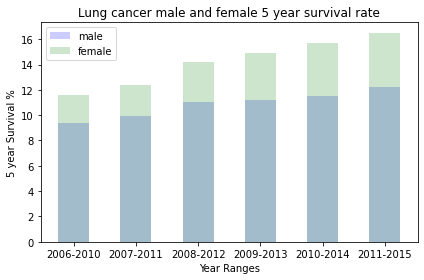

In [14]:
# visualise male and female 5 year survival rate 

# construct data
n_groups = 6

m_survival_5y = []
f_survival_5y = []
for i in range(6):
    m_survival_5y.append(sheets[i].query('type=="Lung" & sex=="Male" & age_group=="Age-standardised" ')['5_year_survival_%'].values[0])
    f_survival_5y.append(sheets[i].query('type=="Lung" & sex=="Female" & age_group=="Age-standardised" ')['5_year_survival_%'].values[0])
    
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.2

rects1 = plt.bar(index, m_survival_5y, bar_width,
alpha=opacity,
color='b',
label='male')

rects1 = plt.bar(index, f_survival_5y, bar_width,
alpha=opacity,
color='g',
label='female')

plt.xlabel('Year Ranges')
plt.ylabel('5 year Survival %')
plt.title('Lung cancer male and female 5 year survival rate')
plt.xticks(index, ('2006-2010', '2007-2011', '2008-2012', '2009-2013', '2010-2014', '2011-2015'))
plt.legend()

plt.tight_layout()
plt.show()

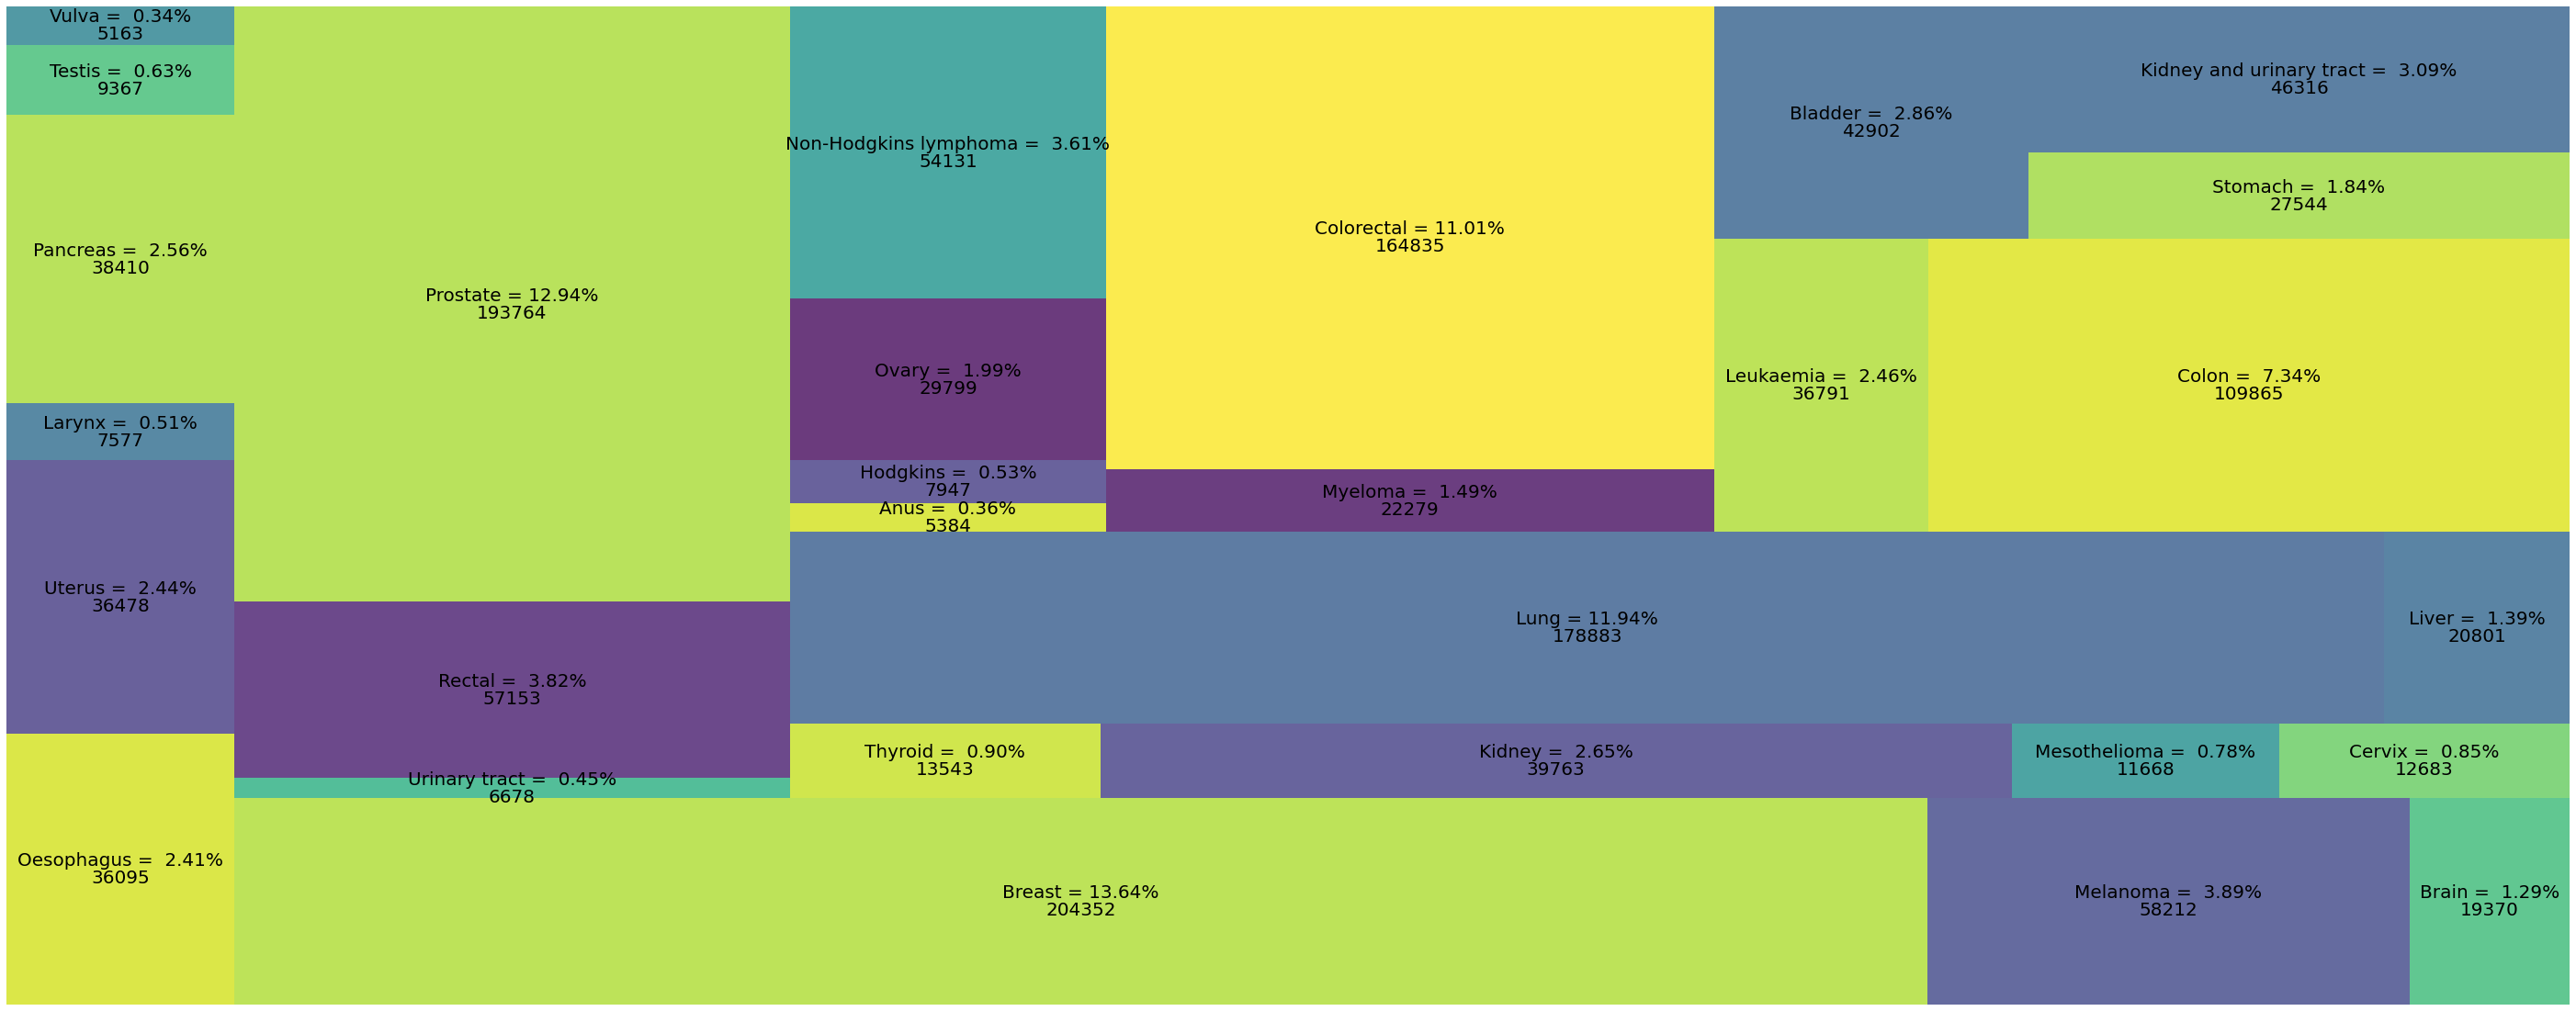

In [15]:
import squarify    # pip install squarify (algorithm for treemap)

total_patients_per_type = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for idx, t in enumerate(types):
    for i in range(6):
        total = 0
        try:
            total += sheets[i].query('type=="'+t+'" & sex=="Male" & age_group=="Age-standardised" ')['number_of_patients'].values[0]
        except:
            total += 0
        try:
            total += sheets[i].query('type=="'+t+'" & sex=="Female" & age_group=="Age-standardised" ')['number_of_patients'].values[0]
        except:
            total += 0
    total_patients_per_type[idx] = int(total)

plt.figure(figsize=(50, 20))
perc = [str('{:5.2f}'.format(i/sum(total_patients_per_type)*100)) + "%" for i in total_patients_per_type]
lbl = [f'{el[0]} = {el[1]}' for el in zip(types, perc)]
squarify.plot(sizes=total_patients_per_type, value = total_patients_per_type, label=lbl, alpha=.8, text_kwargs={'fontsize':20})

plt.axis("off")
plt.show()

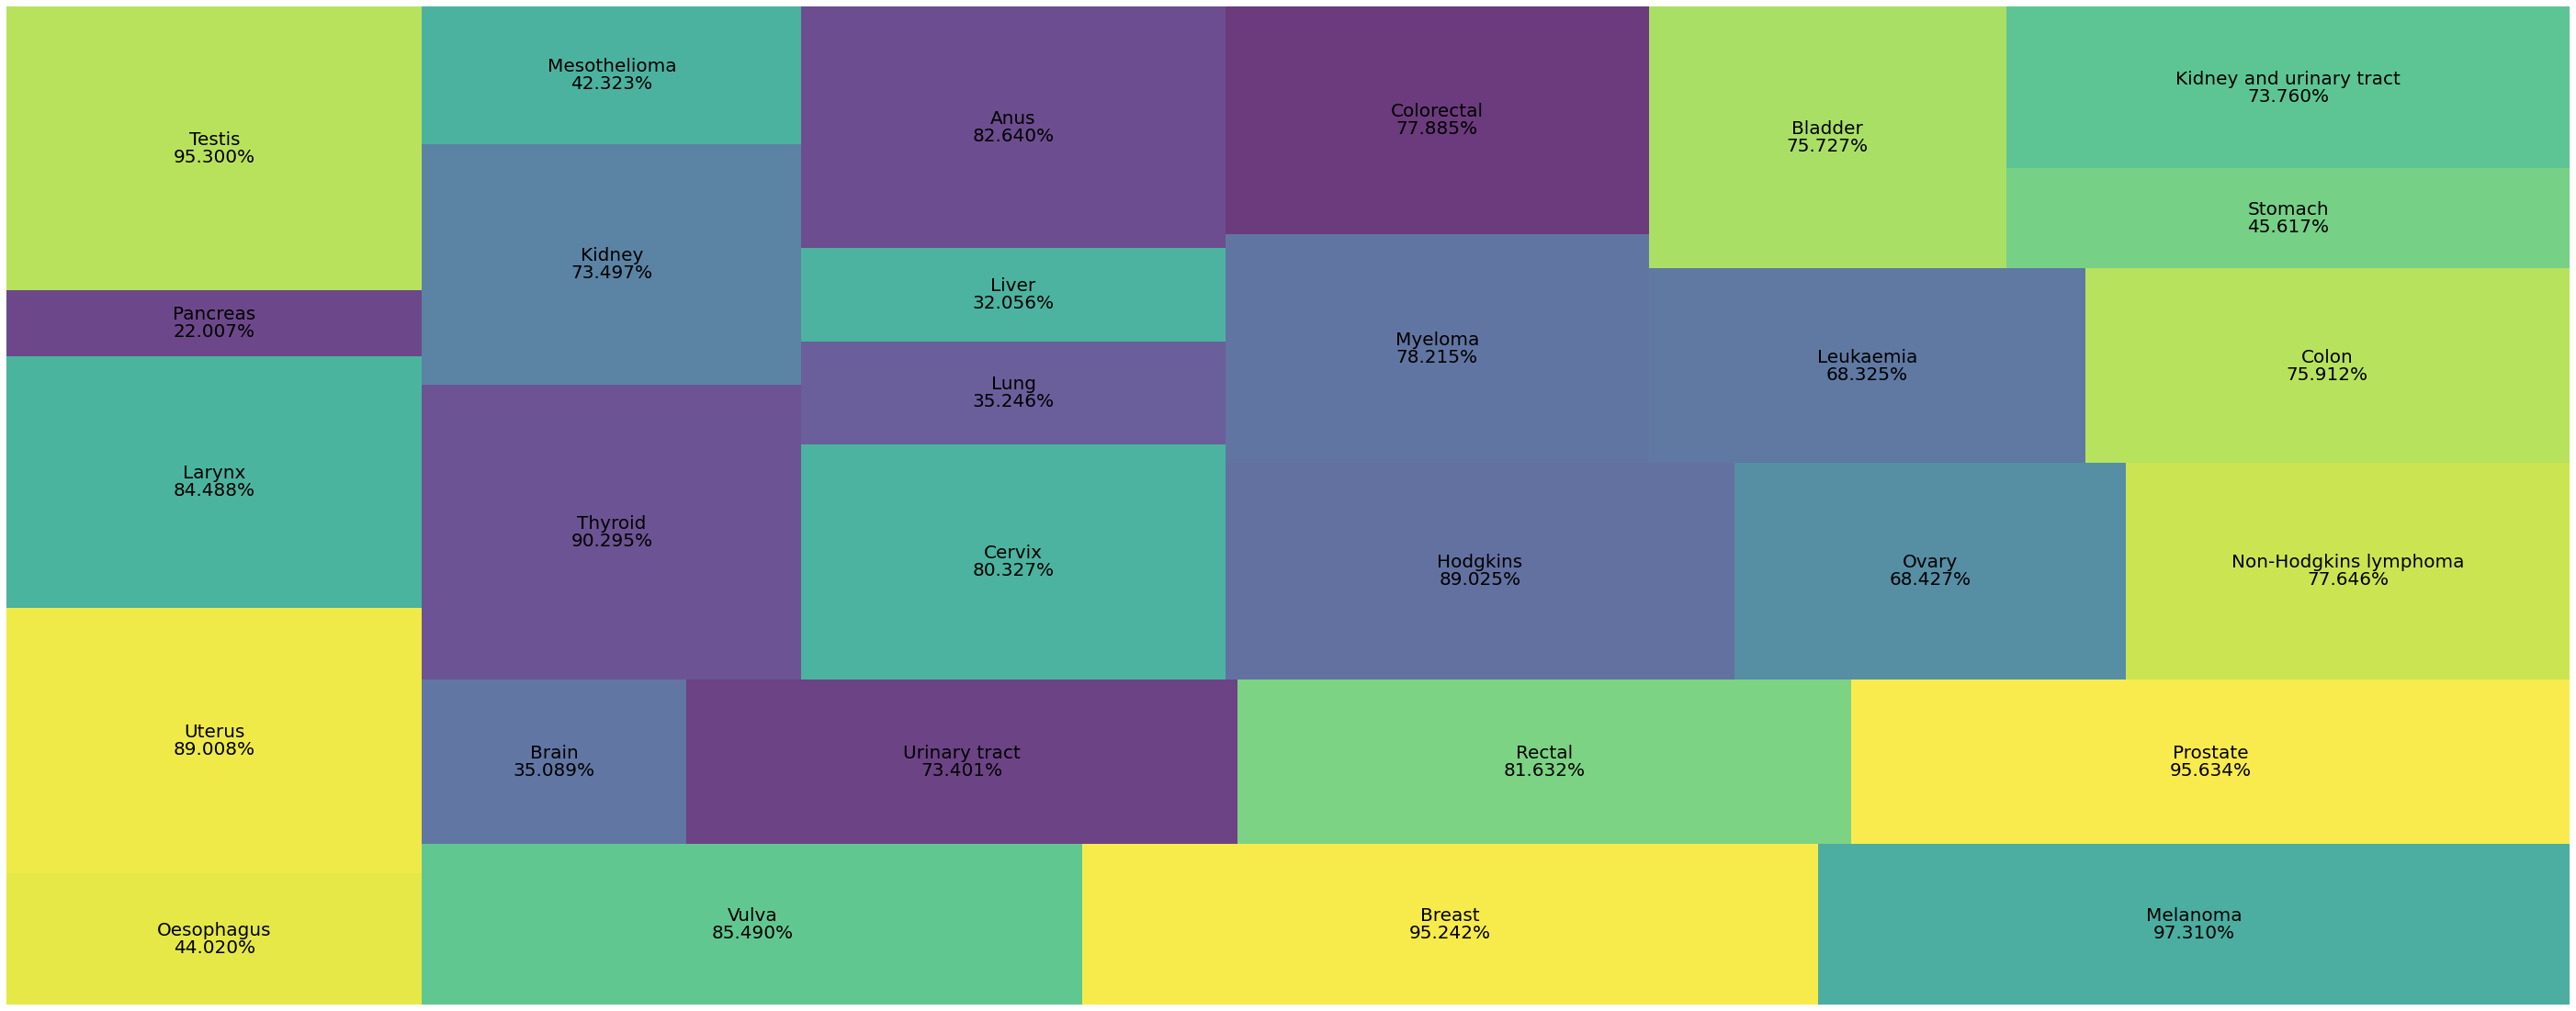

In [16]:
# compare total 1y survival male + female for all types of cancer 
total_1y_survival_per_type = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for idx, t in enumerate(types):
    total_patients_in_all_years = 0
    total_survivors = 0
    # some magic for summing percentages
    for i in range(6):
        try:
            survival_male = sheets[i].query('type=="'+t+'" & sex=="Male" & age_group=="Age-standardised" ')['1_year_survival_%'].values[0]       
            total_male = sheets[i].query('type=="'+t+'" & sex=="Male" & age_group=="Age-standardised" ')['number_of_patients'].values[0]  
            total_patients_in_all_years += total_male
            total_survivors += survival_male*total_male/100
        except:
            total_survivors += 0
            total_patients_in_all_years += 0
        try:
            total_female = sheets[i].query('type=="'+t+'" & sex=="Female" & age_group=="Age-standardised" ')['number_of_patients'].values[0]
            survival_female = sheets[i].query('type=="'+t+'" & sex=="Female" & age_group=="Age-standardised" ')['1_year_survival_%'].values[0]
            total_patients_in_all_years += total_female
            total_survivors += survival_female*total_female/100
        except:
            total_survivors += 0
            total_patients_in_all_years += 0
    total_1y_survival_per_type[idx] = (total_survivors/total_patients_in_all_years)*100

plt.figure(figsize=(50, 20))

squarify.plot(sizes=total_1y_survival_per_type, value=[f'{x:.3f}%' for x in total_1y_survival_per_type], label=types, alpha=.8, text_kwargs={'fontsize':20})

plt.axis("off")
plt.show()

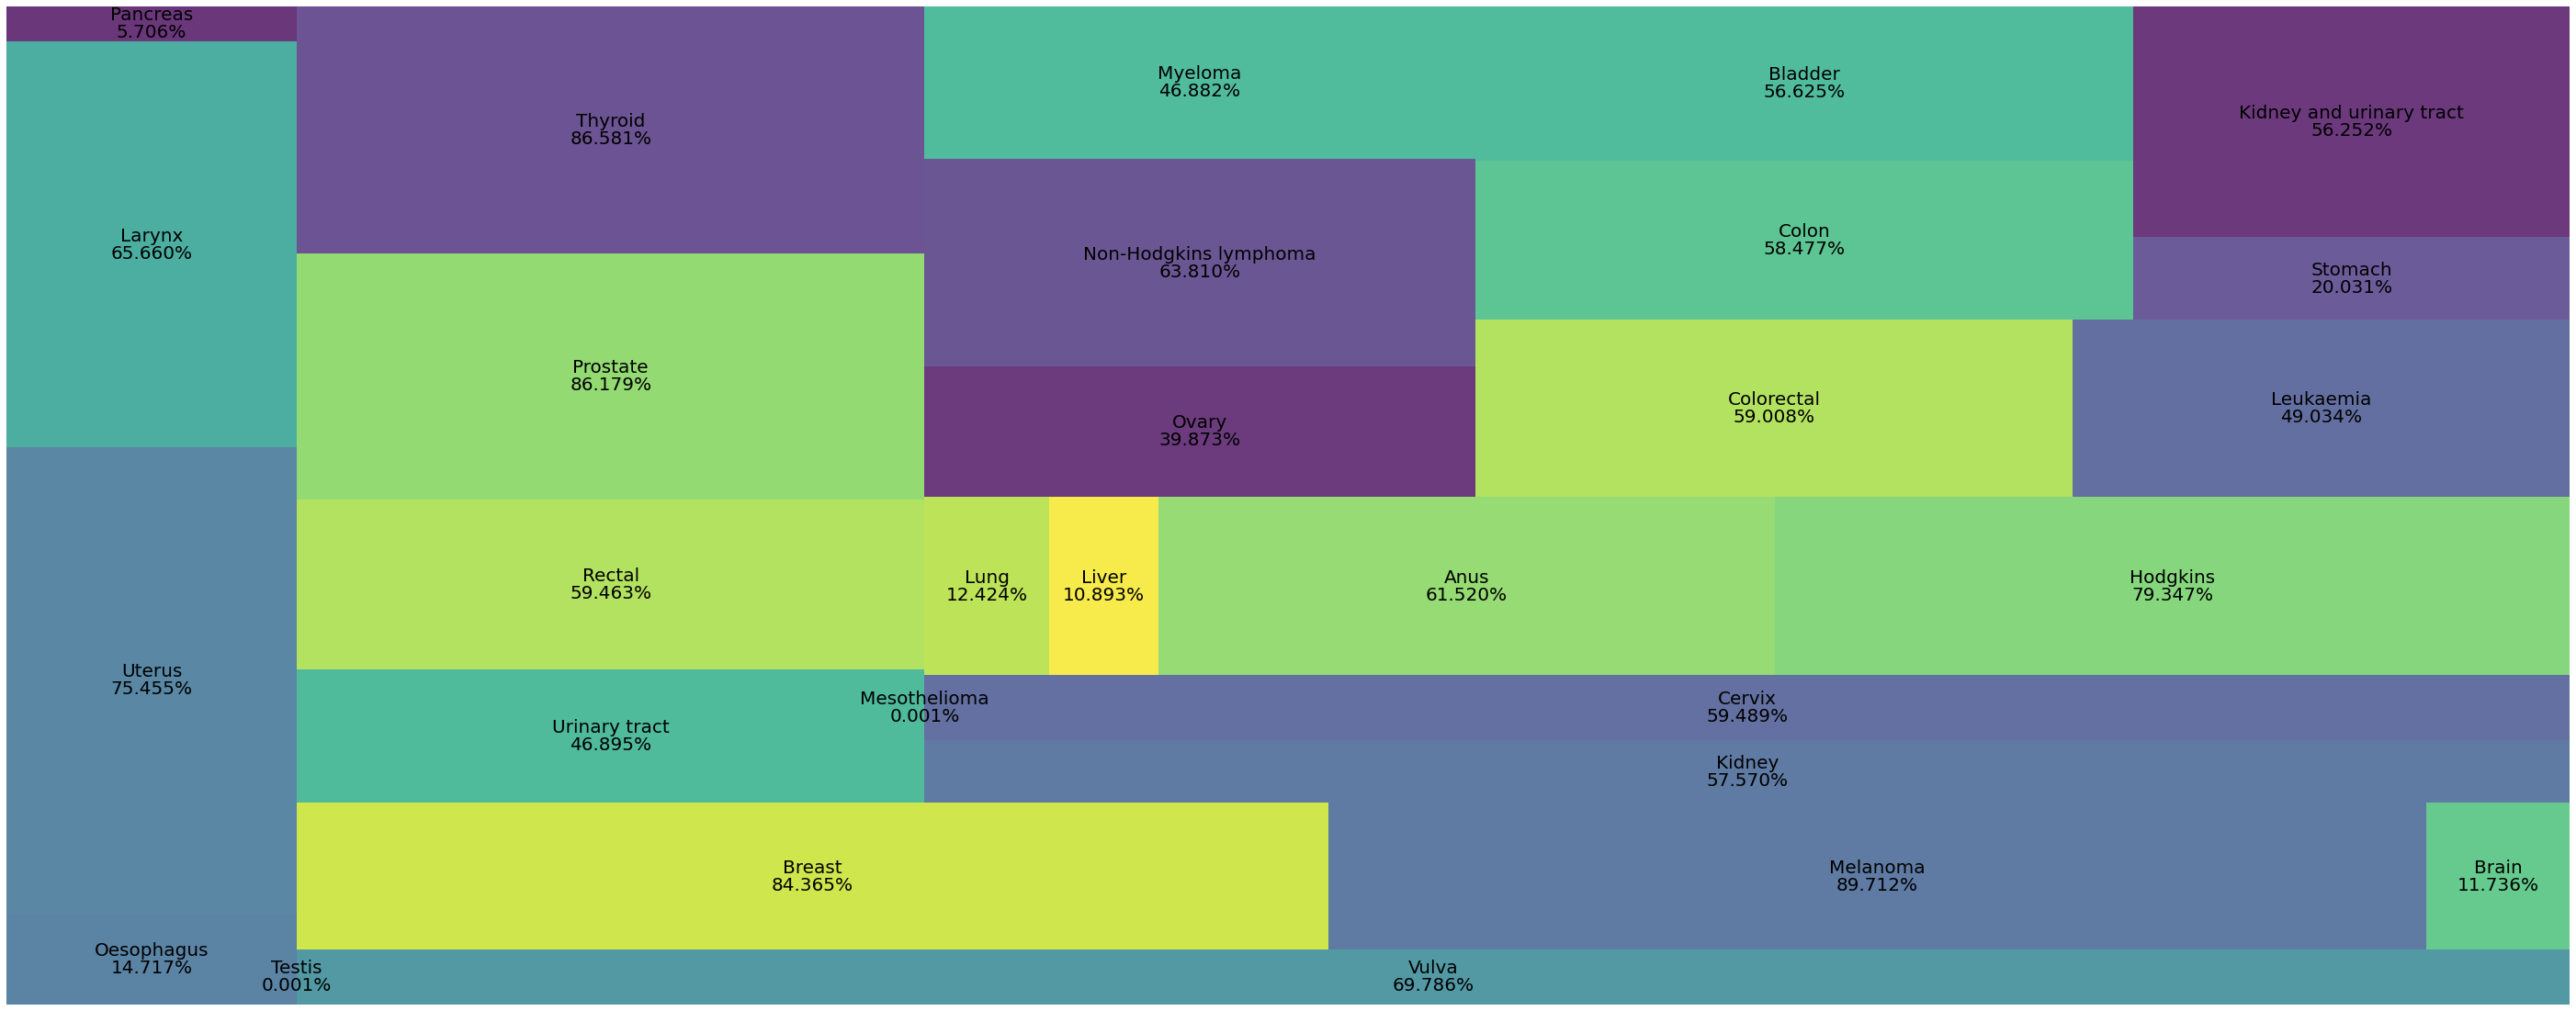

In [17]:
# compare total 5y survival male + female for all types of cancer 

total_5y_survival_per_type = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for idx, t in enumerate(types):
    total_patients_in_all_years = 0
    total_survivors = 0
    # some magic for summing percentages
    for i in range(6):
        try:
            survival_male = sheets[i].query('type=="'+t+'" & sex=="Male" & age_group=="Age-standardised" ')['5_year_survival_%'].values[0]       
            total_male = sheets[i].query('type=="'+t+'" & sex=="Male" & age_group=="Age-standardised" ')['number_of_patients'].values[0]   
            if not str(survival_male) == 'nan':
                total_patients_in_all_years += total_male
                total_survivors += survival_male*total_male/100
        except:
            total_survivors += 0
            total_patients_in_all_years += 0
        try:
            total_female = sheets[i].query('type=="'+t+'" & sex=="Female" & age_group=="Age-standardised" ')['number_of_patients'].values[0]
            survival_female = sheets[i].query('type=="'+t+'" & sex=="Female" & age_group=="Age-standardised" ')['5_year_survival_%'].values[0]
            if not str(survival_female) == 'nan':
                total_patients_in_all_years += total_female
                total_survivors += survival_female*total_female/100
        except:
            total_survivors += 0
            total_patients_in_all_years += 0
    try:
        total_5y_survival_per_type[idx] = (total_survivors/total_patients_in_all_years)*100
    except:
        total_5y_survival_per_type[idx] = 0.001

plt.figure(figsize=(50, 20))

squarify.plot(sizes=total_5y_survival_per_type, value=[f'{x:.3f}%' for x in total_5y_survival_per_type], label=types, alpha=.8, text_kwargs={'fontsize':20})

plt.axis("off")
plt.show()

In [18]:
# claculate percentage change of 1y survival for lung cancer
survival_total_1y = []

total_patients_in_all_years = 0
total_survivors = 0 
for i in range(6):
    try:
        survival_male = sheets[i].query('type=="Lung" & sex=="Male" & age_group=="Age-standardised" ')['1_year_survival_%'].values[0]       
        total_male = sheets[i].query('type=="Lung" & sex=="Male" & age_group=="Age-standardised" ')['number_of_patients'].values[0]  
        total_patients_in_all_years += total_male
        total_survivors += survival_male*total_male/100
    except:
        total_survivors += 0
        total_patients_in_all_years += 0
    try:
        total_female = sheets[i].query('type=="Lung" & sex=="Female" & age_group=="Age-standardised" ')['number_of_patients'].values[0]
        survival_female = sheets[i].query('type=="Lung" & sex=="Female" & age_group=="Age-standardised" ')['1_year_survival_%'].values[0]
        total_patients_in_all_years += total_female
        total_survivors += survival_female*total_female/100
    except:
        total_survivors += 0
        total_patients_in_all_years += 0
    survival_total_1y.append(total_survivors/total_patients_in_all_years)

# calculate percentage change
pd.Series(survival_total_1y).pct_change(periods=2)

0         NaN
1         NaN
2    0.046337
3    0.041832
4    0.039074
5    0.038117
dtype: float64

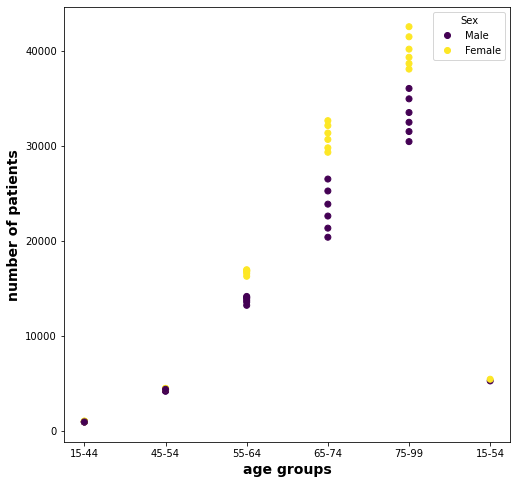

In [19]:
import seaborn as sns

df = pd.DataFrame()
for i in range(6):
    df = df.append(sheets[i].query('type=="Lung" & sex!="Persons" & age_group != "Non-standardised" & age_group != "Age-standardised"'), ignore_index=True)

plt.figure(figsize=(8,8))
scatter = plt.scatter(x=df.age_group,
            y=df.number_of_patients,
            c=df.sex.astype('category').cat.codes)
plt.xlabel("age groups",
            fontweight ='bold',
            size=14)
plt.ylabel("number of patients",
           fontweight ='bold',
           size=14)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=['Male', 'Female'],
           title="Sex")             
plt.show()

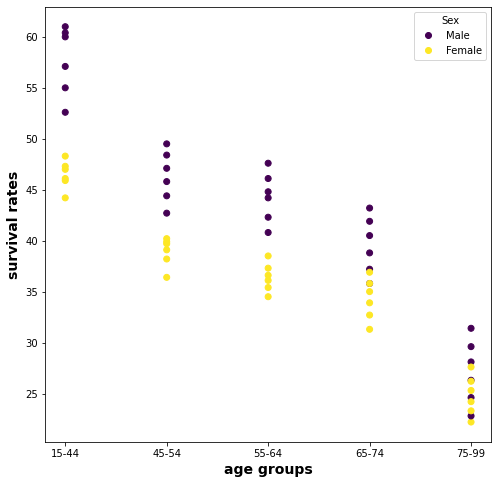

In [20]:
import seaborn as sns
df = pd.DataFrame()
for i in range(6):
    df = df.append(sheets[i].query('type=="Lung" & sex!="Persons" & age_group != "Non-standardised" & age_group != "Age-standardised"'), ignore_index=True)

plt.figure(figsize=(8,8))
scatter = plt.scatter(x=df.age_group,
            y=df['1_year_survival_%'],
            c=df.sex.astype('category').cat.codes)
plt.xlabel("age groups",
            fontweight ='bold',
            size=14)
plt.ylabel("survival rates",
           fontweight ='bold',
           size=14)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=['Male', 'Female'],
           title="Sex")             
plt.show()

R-squared: 0.937843048416628
MSE:  5.6577656267601855
RMSE:  2.8288828133800927


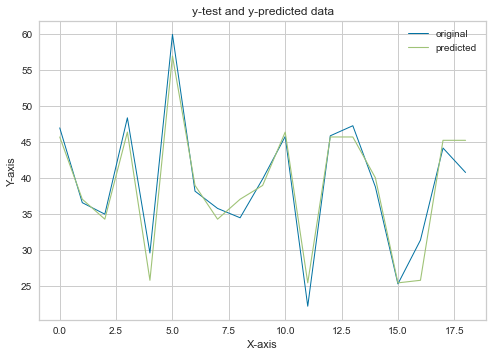

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
import pycaret.regression as caret

df = pd.DataFrame()
for i in range(6):
    df = df.append(sheets[i].query('type=="Lung" & sex!="Persons" & age_group != "Non-standardised" & age_group != "Age-standardised"'), ignore_index=True)

sexes = pd.get_dummies(df['sex'], drop_first=True)
age_group = pd.get_dummies(df['age_group'], drop_first=True)
df.drop(['lower_95%_CI_5_year','lower_95%_CI_1_year', '5_year_survival_%', 'number_of_patients','upper_95%_CI_1_year','upper_95%_CI_5_year', 'type', 'sex', 'age_group'], axis=1, inplace=True)
df = pd.concat([df, sexes, age_group], axis=1)

for idx, survival in enumerate(df['1_year_survival_%']):
    if str(survival) == "nan":
        df['1_year_survival_%'][idx] = df['1_year_survival_%'].mean()

labels = df['1_year_survival_%']
df = df.drop(['1_year_survival_%'], axis=1)

for idx, ag in enumerate(df['45-54']):
    if ag == 1:
        df['45-54'][idx] = 2
        
for idx, ag in enumerate(df['55-64']):
    if ag == 1:
        df['55-64'][idx] = 3
        
for idx, ag in enumerate(df['65-74']):
    if ag == 1:
        df['65-74'][idx] = 4
    
for idx, ag in enumerate(df['75-99']):
    if ag == 1:
        df['75-99'][idx] = 5

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.3 ,random_state = 0)

set_config(print_changed_only=False) 
rfr = RandomForestRegressor()
 
RandomForestRegressor()
rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", score) 

ypred = rfr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [23]:
# import pycaret.regression as caret

# df = pd.DataFrame()
# for i in range(6):
#     df = df.append(sheets[i].query('type=="Lung" & sex!="Persons" & age_group != "Non-standardised" & age_group != "Age-standardised"'), ignore_index=True)

# sexes = pd.get_dummies(df['sex'], drop_first=True)
# age_group = pd.get_dummies(df['age_group'], drop_first=True)
# df.drop(['lower_95%_CI_5_year','lower_95%_CI_1_year', '5_year_survival_%','upper_95%_CI_1_year','upper_95%_CI_5_year', 'type', 'sex', 'age_group'], axis=1, inplace=True)
# df = pd.concat([df, sexes, age_group], axis=1)


# for idx, survival in enumerate(df['1_year_survival_%']):
#     if str(survival) == "nan":
#         df['1_year_survival_%'][idx] = df['1_year_survival_%'].mean()

# labels = df['1_year_survival_%']

# for idx, ag in enumerate(df['45-54']):
#     if ag == 1:
#         df['45-54'][idx] = 2
        
# for idx, ag in enumerate(df['55-64']):
#     if ag == 1:
#         df['55-64'][idx] = 3
        
# for idx, ag in enumerate(df['65-74']):
#     if ag == 1:
#         df['65-74'][idx] = 4
    
# for idx, ag in enumerate(df['75-99']):
#     if ag == 1:
#         df['75-99'][idx] = 5

# X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.3)

# setup = caret.setup(data = X_train,target='1_year_survival_%',categorical_features=['Male','15-54','45-54','55-64','65-74','75-99'],
#                     numeric_features=['number_of_patients'])

# best_model=caret.compare_models(sort='MAE',turbo=False)

# print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1.6633,4.2389,1.8668,0.8858,0.0454,0.0423,0.7070
lar,Least Angle Regression,1.6633,4.2388,1.8668,0.8858,0.0454,0.0423,0.0040
ransac,Random Sample Consensus,1.8674,5.8518,2.1958,0.8480,0.0517,0.0465,0.0050
et,Extra Trees Regressor,2.0160,7.3826,2.5195,0.8019,0.0714,0.0580,0.0290
ard,Automatic Relevance Determination,2.4195,8.1086,2.7781,0.8071,0.0729,0.0642,0.0040
ada,AdaBoost Regressor,3.0373,17.8620,3.7304,0.5448,0.0978,0.0846,0.0140
ridge,Ridge Regression,3.1787,15.7792,3.8516,0.6699,0.0995,0.0840,0.0050
rf,Random Forest Regressor,3.2476,17.8082,3.8049,0.5791,0.1010,0.0890,0.0370
dt,Decision Tree Regressor,3.2967,22.0170,3.9962,0.4842,0.1088,0.0914,0.0050
gbr,Gradient Boosting Regressor,3.3341,20.2921,3.9684,0.5271,0.1086,0.0933,0.0090


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
